# Decision Tree Classifier(ID3)

Problem Statement:

A cloth manufacturing company is interested to predict the value of the Shelf Location attribute for new instances(i.e., new stores or locations).  

================================================================================================================================
About the data: 
Let’s consider a Company dataset with around 11 variables and 400 records. 

The attributes are as follows: 

* Sales -- Unit sales (in thousands) at each location
* Competitor Price -- Price charged by competitor at each location
* Income -- Community income level (in thousands of dollars)
* Advertising -- Local advertising budget for company at each location (in thousands of dollars)
* Population -- Population size in region (in thousands)
* Price -- Price company charges for car seats at each site
* Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
* Age -- Average age of the local population
* Education -- Education level at each location
* Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
* US -- A factor with levels No and Yes to indicate whether the store is in the US or not


Approach - A decision tree can be built with target variable ShelveLoc & The decision tree would use the values of the other attributes (Sales, Competitor Price, Income, Advertising, Population, Price, Age, Education, Urban, and US) to make this prediction. 

In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split#for train test splitting
from sklearn.tree import DecisionTreeClassifier#for decision tree object
from sklearn.metrics import confusion_matrix#for checking testing results
from sklearn.tree import plot_tree#for visualizing tree

In [2]:
#reading the data
company_data = pd.read_csv('Company_Data.csv')
company_data.head()#shows top 5 observations

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


#####  Exploratory Data Analysis

In [3]:
#getting information of dataset
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
company_data['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [5]:
#Describe the data
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [61]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.828750,2.027500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.248334,0.672961,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,53.500000,1.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,2.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,177.500000,3.000000,80.000000,18.000000,1.000000,1.000000


In [6]:
# get shape of dataframe
company_data.shape

(400, 11)

#####  Data Cleaning

In [7]:
#check if any duplicate row
company_data.loc[company_data.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [8]:
#display count of duplicated row 
company_data.duplicated().sum()

0

In [9]:
company_data.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [10]:
company_data.isna().sum()#count of null values

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

#####  Data Preparation

In [11]:
#Check for datatypes
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [12]:
#Creating dummy vairables dropping first dummy variable
company_data=pd.get_dummies(company_data,columns=['Urban','US'], drop_first=True)

In [13]:
print(company_data.head())

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education  Urban_Yes  US_Yes  
0         17          1       1  
1         10          1       1  
2         12          1       1  
3         14          1       1  
4         13          1       0  


In [14]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban_Yes    400 non-null    uint8  
 10  US_Yes       400 non-null    uint8  
dtypes: float64(1), int64(7), object(1), uint8(2)
memory usage: 29.0+ KB


In [15]:
company_data['ShelveLoc']=company_data['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [16]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0


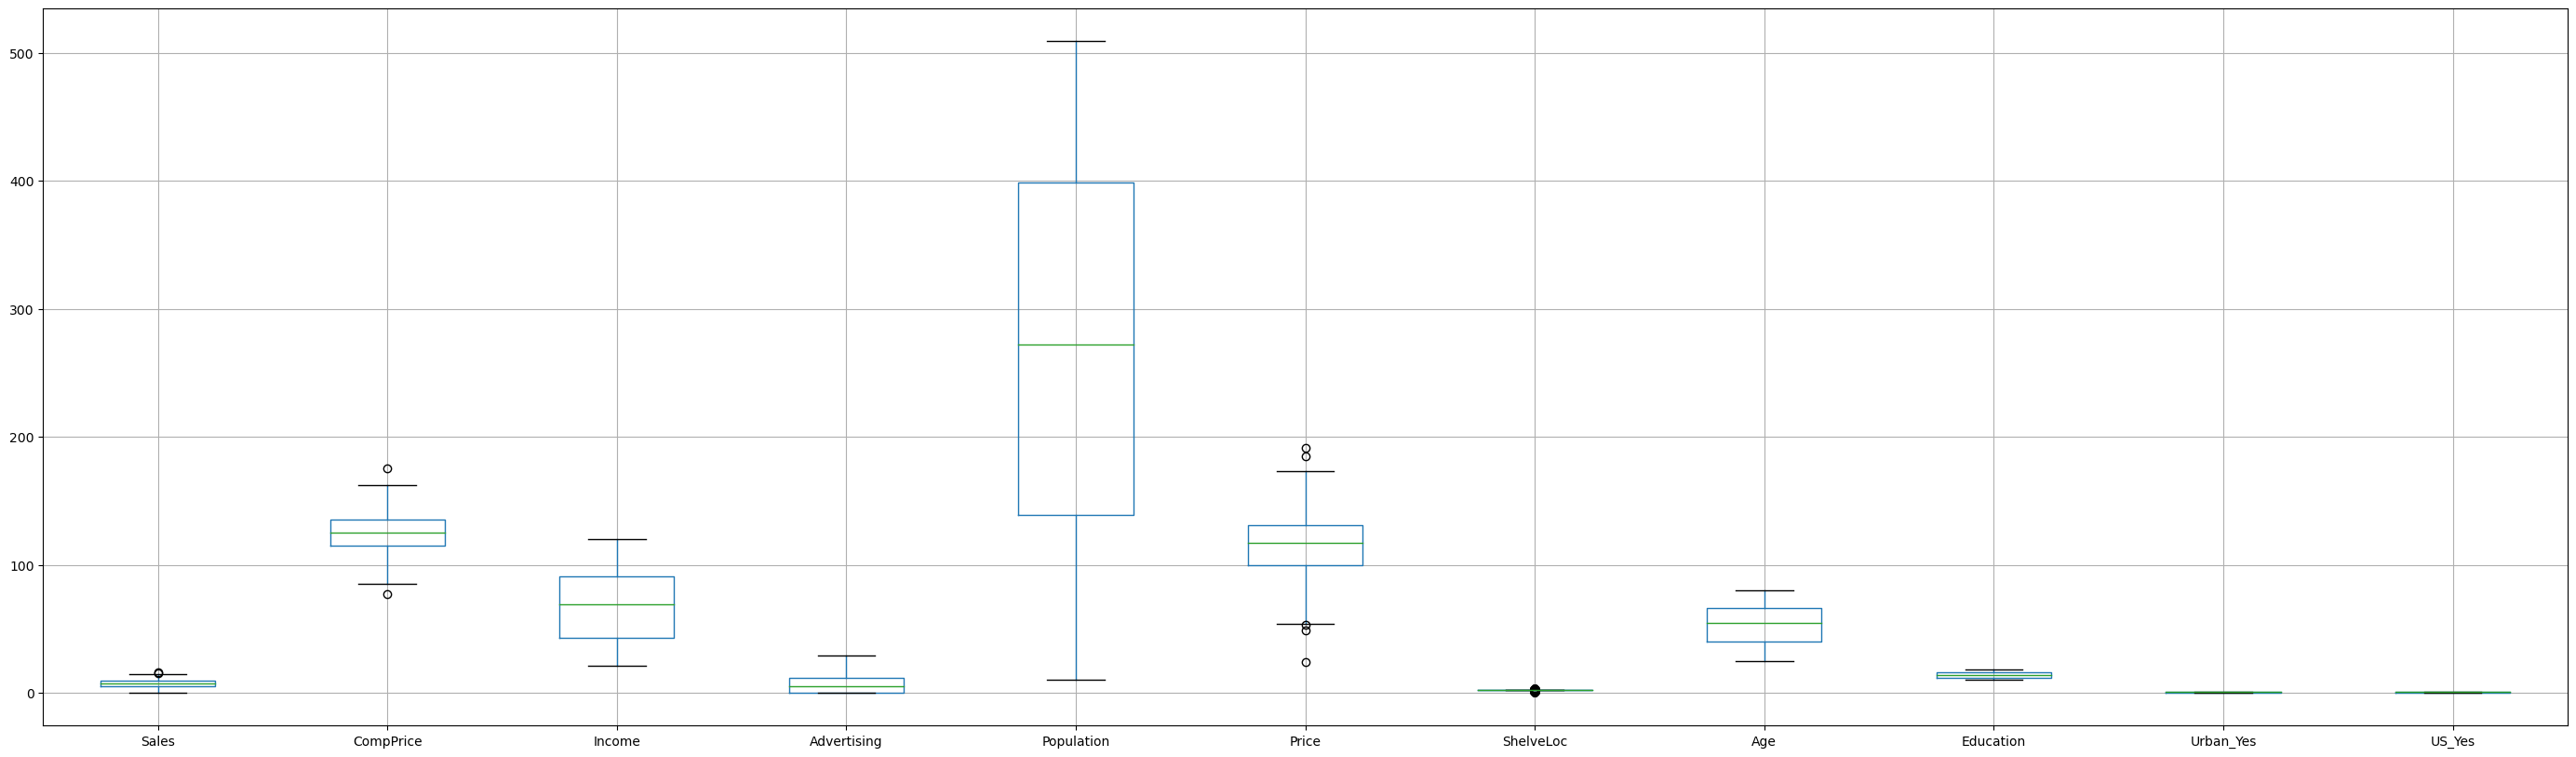

In [17]:
# Checking for outliers
company_data.boxplot(figsize=(35,10))
plt.show()

###### Outlier treatment

In [18]:
#Finding IQR
q3 = company_data['Price'].quantile(0.75)  
q1 = company_data['Price'].quantile(0.25)
#print(q3)
#print(q1)
IQR = q3 - q1
#print(IQR)
lower_limit = q1 - (IQR * 1.5)
print(lower_limit)
upper_limit = q3 + (IQR * 1.5)
print(upper_limit)

53.5
177.5


In [19]:
company_data['Price']=np.where(company_data['Price']>upper_limit,upper_limit,
    np.where(company_data['Price']<lower_limit,lower_limit,company_data['Price']))

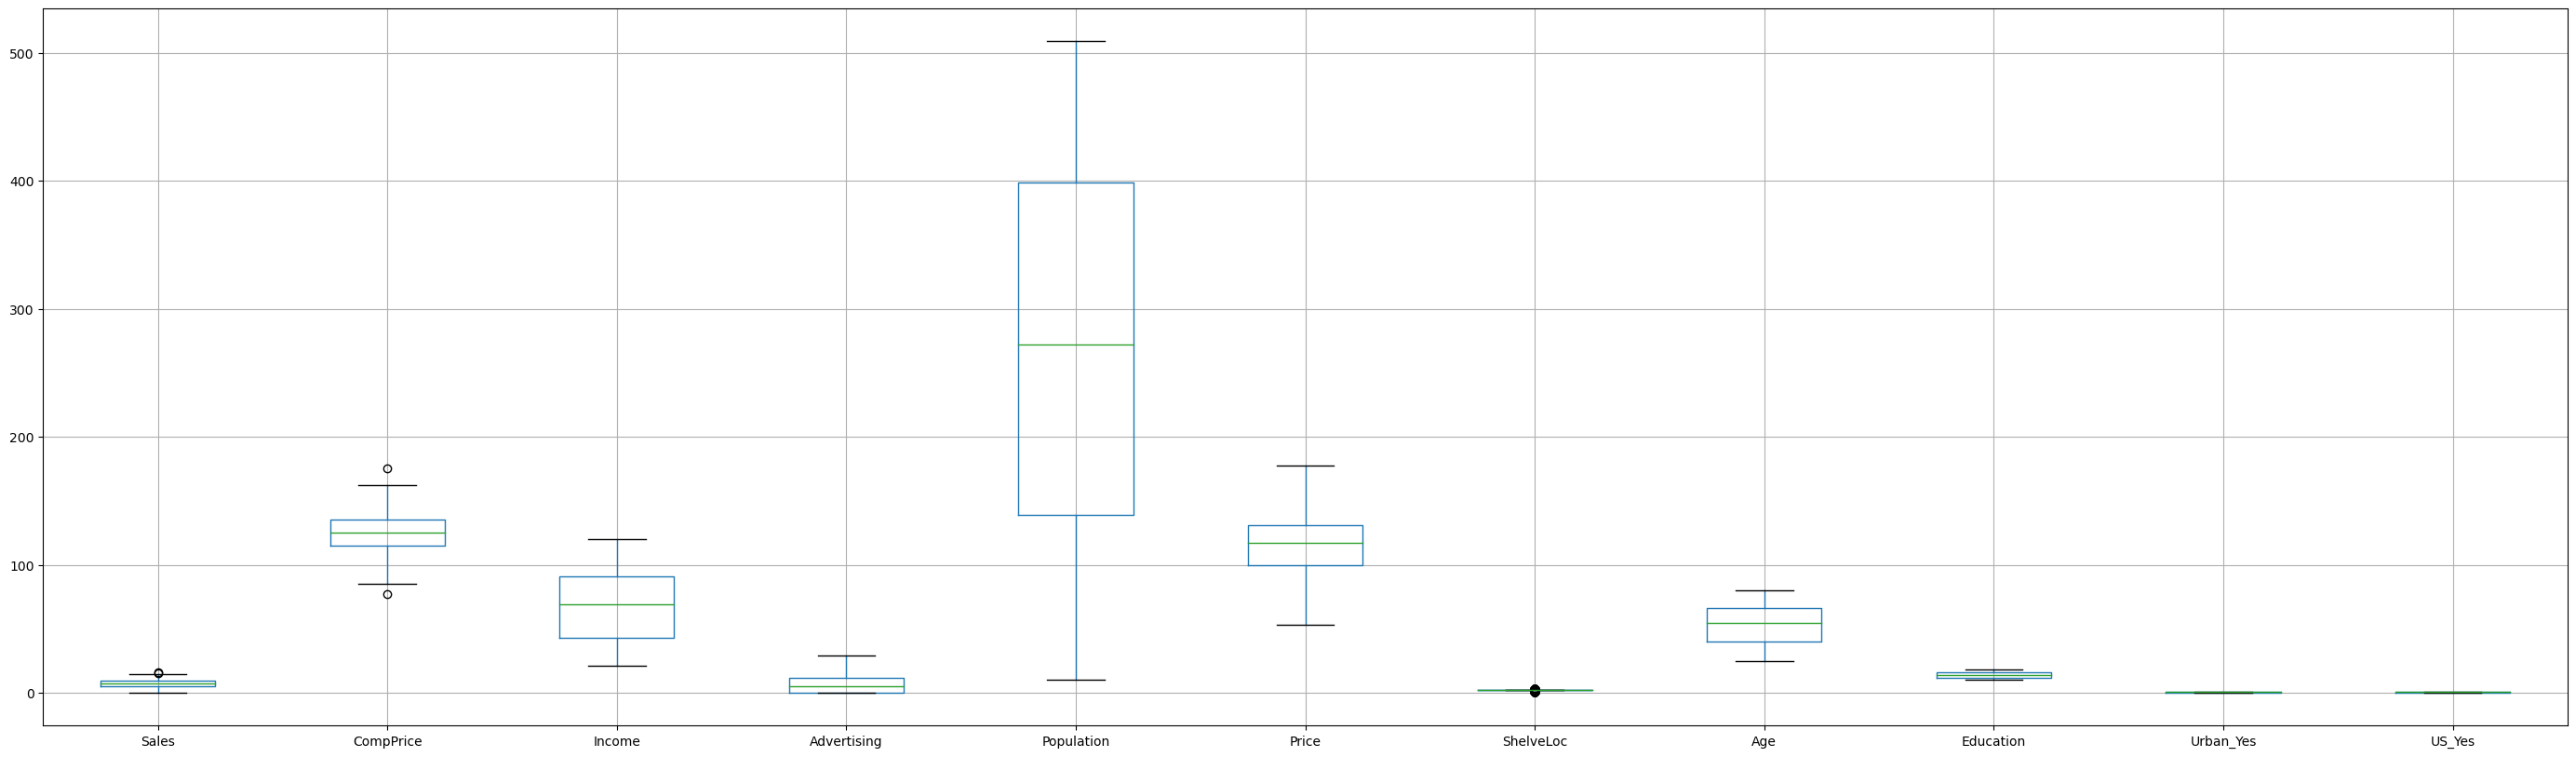

In [20]:
company_data.boxplot(figsize=(35,10))
plt.show()

######  Splitting Input and Output data

In [43]:
X=company_data.drop(labels='ShelveLoc',axis=1)
y=company_data[['ShelveLoc']]

In [44]:
X

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120.0,42,17,1,1
1,11.22,111,48,16,260,83.0,65,10,1,1
2,10.06,113,35,10,269,80.0,59,12,1,1
3,7.40,117,100,4,466,97.0,55,14,1,1
4,4.15,141,64,3,340,128.0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128.0,33,14,1,1
396,6.14,139,23,3,37,120.0,55,11,0,1
397,7.41,162,26,12,368,159.0,40,18,1,1
398,5.94,100,79,7,284,95.0,50,12,1,1


In [45]:
y

,ShelveLoc
0,3
1,1
2,2
3,2
4,3
...,...
395,1
396,2
397,2
398,3


In [46]:
company_data['ShelveLoc'].unique()

array([3, 1, 2], dtype=int64)

In [47]:
company_data.ShelveLoc.value_counts()

2    219
3     96
1     85
Name: ShelveLoc, dtype: int64

In [48]:
colnames = list(company_data.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

In [49]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=40)

# Building Decision Tree Classifier using Entropy Criteria

In [50]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [51]:
from sklearn import tree

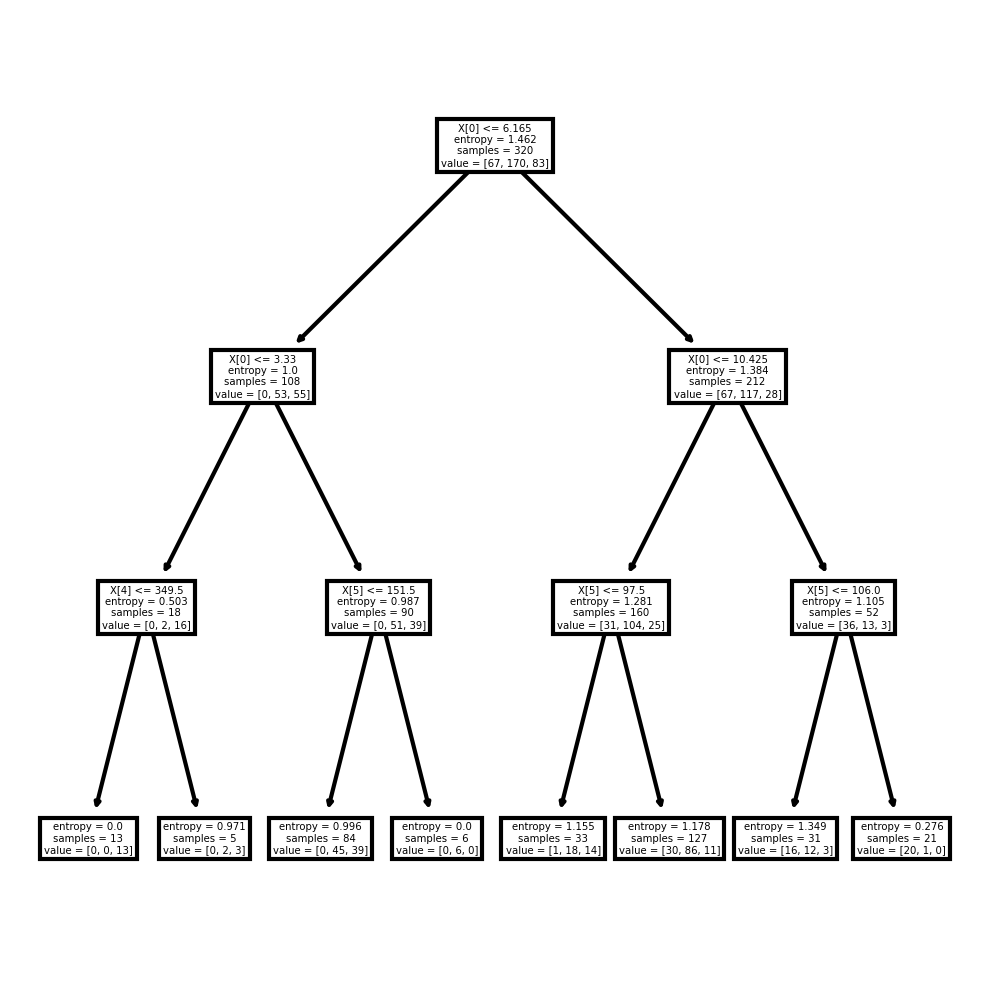

In [52]:
#PLot the decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model)
plt.show()

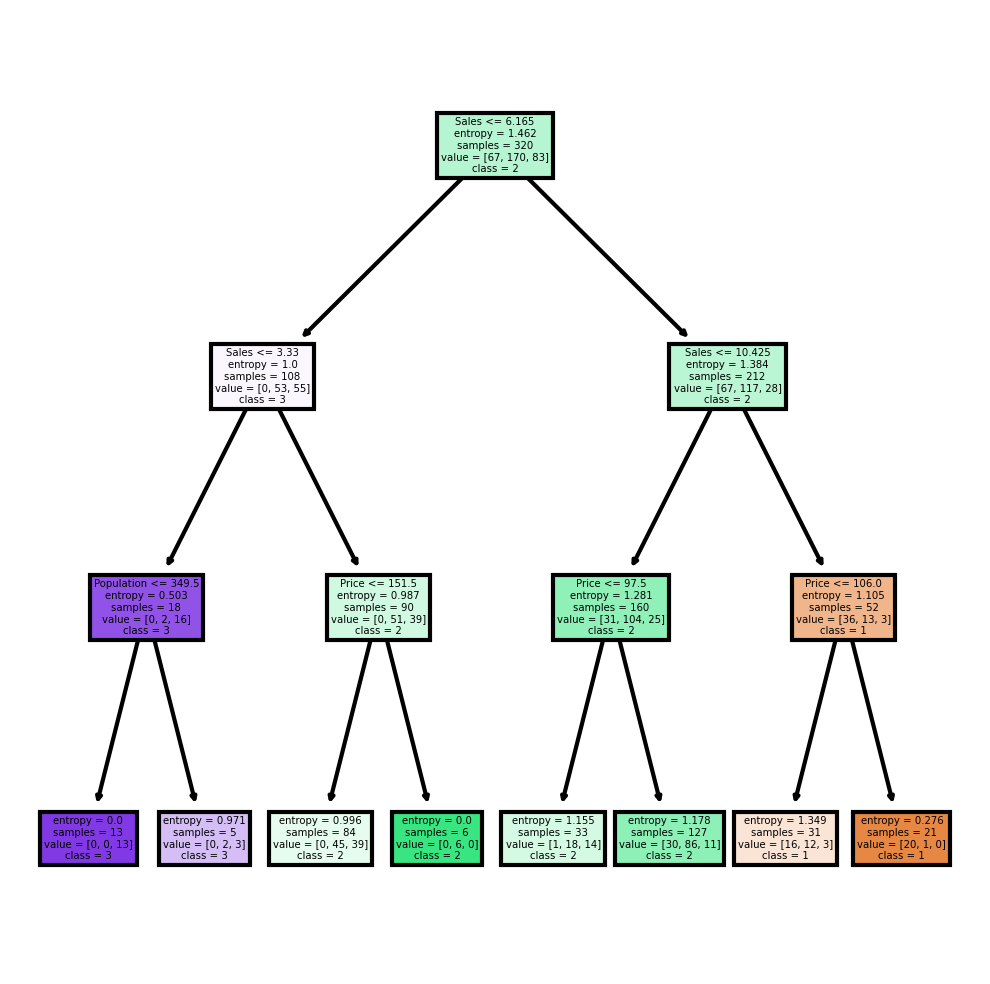

In [53]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.show()

#### Model Evaluation

In [54]:
y_train_pred = model.predict(X_train)

In [55]:
y_test_pred = model.predict(X_test) 

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix

######  Training data

In [57]:
accuracy_score(y_train,y_train_pred)

0.646875

In [58]:
confusion_matrix(y_train,y_train_pred)

array([[ 36,  31,   0],
       [ 13, 155,   2],
       [  3,  64,  16]], dtype=int64)

######  Testing data

In [59]:
accuracy_score(y_test,y_test_pred)

0.625

In [60]:
confusion_matrix(y_test,y_test_pred)

array([[ 8, 10,  0],
       [ 5, 41,  3],
       [ 0, 12,  1]], dtype=int64)

# =============================================================